# Quiz On Regression

The aim of this exercise is to predict the number of games that a Major-League Baseball team won that season, based on the teams statistics and other variables from that season.

## Part A: Data Exploration

In [1]:
# import libraries
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn import linear_model, metrics
from sklearn.grid_search import GridSearchCV
from matplotlib import pyplot as plt
import matplotlib

/Users/jg/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/jg/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
# import "Teams.csv" as teams_df and show the first 5 rows
teams_df = pd.read_csv('../datasets/Teams.csv')
print(teams_df.head())

      0   1    2    3    4  5    6     7   8   9 ...        42   43   44   45  \
0  1961  AL  LAA  ANA  NaN  8  162  82.0  70  91 ...    603510  111  112  LAA   
1  1962  AL  LAA  ANA  NaN  3  162  81.0  86  76 ...   1144063   97   97  LAA   
2  1963  AL  LAA  ANA  NaN  9  161  81.0  70  91 ...    821015   94   94  LAA   
3  1964  AL  LAA  ANA  NaN  5  162  81.0  82  80 ...    760439   90   90  LAA   
4  1965  AL  CAL  ANA  NaN  7  162  80.0  75  87 ...    566727   97   98  CAL   

    46   47   48                             49  50   51  
0  LAA  LAA  ANA  Los Angeles Angels of Anaheim   Y  NaN  
1  LAA  LAA  ANA  Los Angeles Angels of Anaheim   Y  NaN  
2  LAA  LAA  ANA  Los Angeles Angels of Anaheim   Y  NaN  
3  LAA  LAA  ANA  Los Angeles Angels of Anaheim   Y  NaN  
4  CAL  CAL  ANA  Los Angeles Angels of Anaheim   Y  NaN  

[5 rows x 52 columns]


In [3]:
#describe data
teams_df.describe()

0            5            6            7            8  \
count  2287.000000  2287.000000  2287.000000  2265.000000  2287.000000   
mean   1967.512462     3.925667   158.959773    79.503753    79.230433   
std      33.207119     2.155926     3.764287     2.091990    13.045240   
min    1892.000000     1.000000   150.000000    68.000000    36.000000   
25%    1940.000000     2.000000   155.000000    78.000000    70.000000   
50%    1972.000000     4.000000   162.000000    81.000000    80.000000   
75%    1997.000000     5.000000   162.000000    81.000000    89.000000   
max    2016.000000    12.000000   165.000000    84.000000   116.000000   

                 9           14           15           16           17  \
count  2287.000000  2287.000000  2287.000000  2287.000000  2287.000000   
mean     79.086139   700.365982  5414.390031  1414.773502   244.439440   
std      13.024542   102.720336   172.157391   106.132452    45.846798   
min      36.000000   371.000000  4768.000000  1044.000000   110.000000   
25%      70.000000   634.000000  5297.500000  1348.000000   212.000000   
50%      79.000000   698.000000  5457.000000  1413.000000   245.000000   
75%      88.000000   765.000000  5538.000000  1486.500000   278.000000   
max     120.000000  1067.000000  5781.000000  1783.000000   376.000000   

          ...                33           34           35           36  \
count     ...       2287.000000  2287.000000  2287.000000  2287.000000   
mean      ...       1414.184521   117.460866   513.413205   817.533887   
std       ...        109.631025    51.877465    81.845625   258.356654   
min       ...       1018.000000     5.000000   233.000000   281.000000   
25%       ...       1343.000000    83.000000   462.000000   592.500000   
50%       ...       1415.000000   124.000000   512.000000   834.000000   
75%       ...       1484.000000   156.000000   567.000000  1012.500000   
max       ...       1993.000000   258.000000   827.000000  1510.000000   

                37           38           39            42           43  \
count  2287.000000  2265.000000  2287.000000  2.287000e+03  2287.000000   
mean    151.546130   145.466667     0.975552  1.441997e+06   100.205509   
std      57.949909    23.682023     0.008877  9.389702e+05     4.513778   
min      54.000000    64.000000     0.913000  8.092200e+04    88.000000   
25%     113.000000   132.000000     0.972000  6.419195e+05    97.000000   
50%     137.000000   147.000000     0.978000  1.250722e+06   100.000000   
75%     171.500000   161.000000     0.982000  2.108386e+06   103.000000   
max     565.000000   217.000000     0.991000  4.483350e+06   127.000000   

                44  
count  2287.000000  
mean    100.197202  
std       4.563255  
min      88.000000  
25%      97.000000  
50%     100.000000  
75%     103.000000  
max     127.000000  

[8 rows x 35 columns]

### What this data means?

Each of the columns contain data related to a specific team and year. Some of the more important variables are listed below.
* yearID - Year
* teamID - Team
* franchID - Franchise (links to TeamsFranchise table)
* G - Games played
* W - Wins
* LgWin - League Champion(Y or N)
* WSWin - World Series Winner (Y or N)
* R - Runs scored
* AB - At bats
* H - Hits by batters
* HR - Homeruns by batters
* BB - Walks by batters
* SO - Strikeouts by batters
* SB - Stolen bases
* CS - Caught stealing
* HBP - Batters hit by pitch
* SF - Sacrifice flies
* RA - Opponents runs scored
* ER - Earned runs allowed
* ERA - Earned run average
* CG - Complete games
* SHO - Shutouts
* SV - Saves
* IPOuts - Outs Pitched (innings pitched x 3)
* HA - Hits allowed
* HRA - Homeruns allowed
* BBA - Walks allowed
* SOA - Strikeouts by pitchers
* E - Errors
* DP - Double Plays
* FP - Fielding percentage
* name - Team’s full name


In [4]:
# Adding column names to dataframe
cols = ['yearID','lgID','teamID','franchID','divID','Rank','G','Ghome','W','L','DivWin','WCWin','LgWin','WSWin','R','AB','H','2B','3B','HR','BB','SO','SB','CS','HBP','SF','RA','ER','ERA','CG','SHO','SV','IPouts','HA','HRA','BBA','SOA','E','DP','FP','name','park','attendance','BPF','PPF','teamIDBR','teamIDlahman45','teamIDretro','franchID','franchName','active','NAassoc']
teams_df.columns = cols

# Print the first rows of `teams_df`
print(teams_df.head())

# Print the length of `teams_df`
print(len(teams_df))

   yearID lgID teamID  franchID divID  Rank    G  Ghome   W   L   ...     \
0    1961   AL    LAA       ANA   NaN     8  162   82.0  70  91   ...      
1    1962   AL    LAA       ANA   NaN     3  162   81.0  86  76   ...      
2    1963   AL    LAA       ANA   NaN     9  161   81.0  70  91   ...      
3    1964   AL    LAA       ANA   NaN     5  162   81.0  82  80   ...      
4    1965   AL    CAL       ANA   NaN     7  162   80.0  75  87   ...      

  attendance  BPF  PPF teamIDBR  teamIDlahman45  teamIDretro  franchID  \
0     603510  111  112      LAA             LAA          LAA       ANA   
1    1144063   97   97      LAA             LAA          LAA       ANA   
2     821015   94   94      LAA             LAA          LAA       ANA   
3     760439   90   90      LAA             LAA          LAA       ANA   
4     566727   97   98      CAL             CAL          CAL       ANA   

                      franchName  active  NAassoc  
0  Los Angeles Angels of Anaheim       Y      

In [5]:
# Dropping your unnecesary column variables.
drop_cols = ['lgID','franchID','divID','Rank','Ghome','L','DivWin','WCWin','LgWin','WSWin','SF','name','park','attendance','BPF','PPF','teamIDBR','teamIDlahman45','teamIDretro','franchID','franchName','active','NAassoc']
df = teams_df.drop(drop_cols, axis=1)

# Print out first rows of `df`
print(df.head())

   yearID teamID    G   W    R    AB     H   2B  3B   HR  ...    SHO  SV  \
0    1961    LAA  162  70  744  5424  1331  218  22  189  ...      5  34   
1    1962    LAA  162  86  718  5499  1377  232  35  137  ...     15  47   
2    1963    LAA  161  70  597  5506  1378  208  38   95  ...     13  31   
3    1964    LAA  162  82  544  5362  1297  186  27  102  ...     28  41   
4    1965    CAL  162  75  527  5354  1279  200  36   92  ...     14  33   

   IPouts    HA  HRA  BBA  SOA    E     DP     FP  
0    4314  1391  180  713  973  192  154.0  0.969  
1    4398  1412  118  616  858  175  153.0  0.972  
2    4365  1317  120  578  889  163  155.0  0.974  
3    4350  1273  100  530  965  138  168.0  0.978  
4    4323  1259   91  563  847  123  149.0  0.981  

[5 rows x 29 columns]


In [6]:
# Print out the number of null values of all columns of `df`
print(df.isnull().sum(axis=0).tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 110, 0, 419, 1777, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 22, 0]


In [7]:
# Eliminating columns with more than 100 null values ... in this case "CS" and "BHP"
df = df.drop(['CS','HBP'], axis=1)

# Filling null values of "SO" and "DP" using median
df['SO'] = df['SO'].fillna(df['SO'].median())
df['DP'] = df['DP'].fillna(df['DP'].median())

# Print out null values of all columns of `df`
print(df.isnull().sum(axis=0).tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


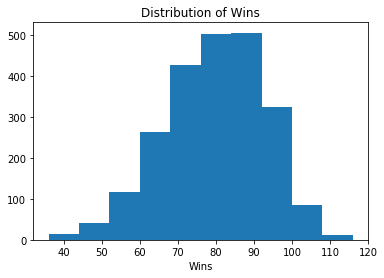

In [8]:
# matplotlib plots inline  
%matplotlib inline

# Plotting Histogram of of "W"
plt.hist(df['W'])
plt.xlabel('Wins')
plt.title('Distribution of Wins')

plt.show()

In [9]:
# Print mean of "W"
print(df['W'].mean())

79.2304328815


In [10]:
# Creating bins for the win column
def assign_win_bins(W):
    if W < 50:
        return 1
    if W >= 50 and W <= 69:
        return 2
    if W >= 70 and W <= 89:
        return 3
    if W >= 90 and W <= 109:
        return 4
    if W >= 110:
        return 5
    
df['win_bins'] = df['W'].apply(assign_win_bins)

In [11]:
# Filter for rows where 'yearID' is greater than 1900
df = df[df['yearID'] > 1900]

In [12]:
# Creating "year_label" column, which will give your algorithm information about how certain years are related 
# (Dead ball eras, Live ball/Steroid Eras)

def assign_label(year):
    if year < 1920:
        return 1
    elif year >= 1920 and year <= 1941:
        return 2
    elif year >= 1942 and year <= 1945:
        return 3
    elif year >= 1946 and year <= 1962:
        return 4
    elif year >= 1963 and year <= 1976:
        return 5
    elif year >= 1977 and year <= 1992:
        return 6
    elif year >= 1993 and year <= 2009:
        return 7
    elif year >= 2010:
        return 8
        
# Add `year_label` column to `df`    
df['year_label'] = df['yearID'].apply(assign_label)

dummy_df = pd.get_dummies(df['year_label'], prefix='era')

# Concatenate `df` and `dummy_df`
df = pd.concat([df, dummy_df], axis=1)

print(df.head())

   yearID teamID    G   W    R    AB     H   2B  3B   HR  ...    win_bins  \
0    1961    LAA  162  70  744  5424  1331  218  22  189  ...           3   
1    1962    LAA  162  86  718  5499  1377  232  35  137  ...           3   
2    1963    LAA  161  70  597  5506  1378  208  38   95  ...           3   
3    1964    LAA  162  82  544  5362  1297  186  27  102  ...           3   
4    1965    CAL  162  75  527  5354  1279  200  36   92  ...           3   

   year_label  era_1  era_2  era_3  era_4  era_5  era_6  era_7  era_8  
0           4      0      0      0      1      0      0      0      0  
1           4      0      0      0      1      0      0      0      0  
2           5      0      0      0      0      1      0      0      0  
3           5      0      0      0      0      1      0      0      0  
4           5      0      0      0      0      1      0      0      0  

[5 rows x 37 columns]


In [13]:
# Convert years into decade bins and creating dummy variables
def assign_decade(year):
    if year < 1920:
        return 1910
    elif year >= 1920 and year <= 1929:
        return 1920
    elif year >= 1930 and year <= 1939:
        return 1930
    elif year >= 1940 and year <= 1949:
        return 1940
    elif year >= 1950 and year <= 1959:
        return 1950
    elif year >= 1960 and year <= 1969:
        return 1960
    elif year >= 1970 and year <= 1979:
        return 1970
    elif year >= 1980 and year <= 1989:
        return 1980
    elif year >= 1990 and year <= 1999:
        return 1990
    elif year >= 2000 and year <= 2009:
        return 2000
    elif year >= 2010:
        return 2010
    
df['decade_label'] = df['yearID'].apply(assign_decade)
decade_df = pd.get_dummies(df['decade_label'], prefix='decade')
df = pd.concat([df, decade_df], axis=1)

# Drop unnecessary columns
df = df.drop(['yearID','year_label','decade_label'], axis=1)

In [14]:
# Create new features for Runs per Game and Runs Allowed per Game
df['R_per_game'] = df['R'] / df['G']
df['RA_per_game'] = df['RA'] / df['G']

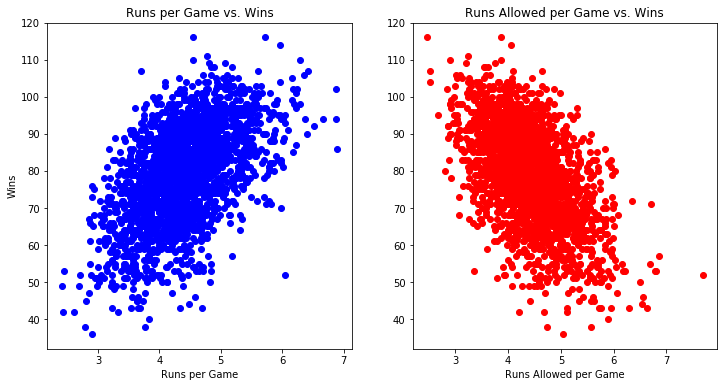

In [15]:
# Create scatter plots for runs per game vs. wins and runs allowed per game vs. wins
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.scatter(df['R_per_game'], df['W'], c='blue')
ax1.set_title('Runs per Game vs. Wins')
ax1.set_ylabel('Wins')
ax1.set_xlabel('Runs per Game')

ax2.scatter(df['RA_per_game'], df['W'], c='red')
ax2.set_title('Runs Allowed per Game vs. Wins')
ax2.set_xlabel('Runs Allowed per Game')

plt.show()

In [16]:
df.corr()['W']

G              0.178958
W              1.000000
R              0.551504
AB             0.233996
H              0.380281
2B             0.262323
3B             0.016970
HR             0.312713
BB             0.345348
SO             0.072069
SB             0.133300
RA            -0.518313
ER            -0.372580
ERA           -0.425833
CG            -0.041788
SHO            0.426892
SV             0.382174
IPouts         0.326087
HA            -0.384893
HRA            0.009880
BBA           -0.284782
SOA            0.259205
E             -0.304725
DP             0.015192
FP             0.319597
win_bins       0.912545
era_1         -0.077104
era_2         -0.083089
era_3         -0.033073
era_4         -0.052278
era_5          0.042122
era_6          0.058439
era_7          0.066049
era_8          0.043453
decade_1910   -0.077104
decade_1920   -0.055176
decade_1930   -0.052358
decade_1940   -0.050249
decade_1950   -0.047499
decade_1960    0.028594
decade_1970    0.033679
decade_1980    0

In [17]:
df.shape

(2265, 48)

## Part B: Modeling

### Create and compare different models to predict "W" in function of other inputs.

In [18]:
# Create new DataFrame using only variables to be included in models
numeric_cols = ['G','R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG','SHO','SV','IPouts','HA','HRA','BBA','SOA','E','DP','FP','era_1','era_2','era_3','era_4','era_5','era_6','era_7','era_8','decade_1910','decade_1920','decade_1930','decade_1940','decade_1950','decade_1960','decade_1970','decade_1980','decade_1990','decade_2000','decade_2010','R_per_game','RA_per_game']
X = df[numeric_cols]
y = df['W']

# Create X_train, X_test, y_train, y_test (25% tesing anf 75% training/validation)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,test_size=0.25)

# print shapes of X_train, X_test, y_train, y_test 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1698, 45)
(1698,)
(567, 45)
(567,)


In [19]:
# Create 3 models: OLS, Ridge (default hyperparameters), and Lasso (default hyperparameters) 
# where you train the model on Training Data and test it on Testing Data.
# Print out the MSE and R2 values of each model.

lm = linear_model.LinearRegression().fit(X_train, y_train)
print "~~~ OLS ~~~"
print 'OLS MSE: ', metrics.mean_squared_error(y_test, lm.predict(X_test))
print 'OLS R2:', lm.score(X_test, y_test)

la = linear_model.Lasso().fit(X_train, y_train)
print "~~~ Lasso ~~~"
print 'Lasso MSE: ', metrics.mean_squared_error(y_test, la.predict(X_test))
print 'Lasso R2:', la.score(X_test, y_test)

rl = linear_model.Ridge().fit(X_train, y_train)
print "~~~ Ridge ~~~"
print 'Ridge MSE: ', metrics.mean_squared_error(y_test, rl.predict(X_test))
print 'Ridge R2:', rl.score(X_test, y_test)

~~~ OLS ~~~
OLS MSE:  12.986972629
OLS R2: 0.92340918049
~~~ Lasso ~~~
Lasso MSE:  14.0900909054
Lasso R2: 0.916903527847
~~~ Ridge ~~~
Ridge MSE:  13.0258440698
Ridge R2: 0.923179935724


#### Which model was the best?
Answer: OLS model

In [20]:
# What are the properties (hyperparameters) of trained Lasso Regression
la

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [21]:
# What are the properties (hyperparameters) of trained Ridge Regression
rl

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [22]:
# Create Grid Search to find the best "alpha" and "normalize" hyperparameters
# for Lasso Regression. Print out the best estimators and best scores

param_grid = [{"alpha": [10,8,5,4,3,2,1,0.5, 1e-1, 1e-2, 1e-3]}, {"normalize": [True,False]}]
lasso = GridSearchCV(linear_model.Lasso(), param_grid, cv=5)
lasso.fit(X_train, y_train)
print('Best estimator for Lasso', lasso.best_estimator_)

print('Best score for Lasso:', lasso.best_score_) 

/Users/jg/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


('Best estimator for Lasso', Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))
('Best score for Lasso:', 0.927100733928652)


In [23]:
# Create Grid Search to find the best "alpha" and "normalize" hyperparameters
# for Ridge Regression. Print out the best estimators and best scores

ridge = GridSearchCV(linear_model.Ridge(), param_grid, cv=5)
ridge.fit(X_train, y_train)
print('Best estimator for Ridge', ridge.best_estimator_)

print('Best score for Ridge:', ridge.best_score_) 

('Best estimator for Ridge', Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))
('Best score for Ridge:', 0.9270653525982833)


In [24]:
# Which model was the best out of OLS, Lasso, and Ridge? What was its R2 and MSE values?
print 'LASSO MSE: ', metrics.mean_squared_error(y_test, lasso.predict(X_test))
print 'LASSO R2:', rl.score(X_test, y_test)

LASSO MSE:  13.1252766998
LASSO R2: 0.923179935724


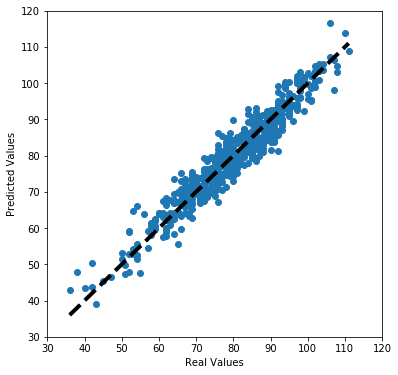

In [25]:
# Plot a scatterplot of "Real Values" vs "Predicted Values" of the best performing model

plt.figure(figsize=(6, 6))
plt.xlim([30, 120])
plt.ylim([30, 120])

plt.scatter(y_test, lasso.predict(X_test))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.show()